In [1]:
import scipy.misc
import numpy as np
from sklearn.linear_model import LinearRegression
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def linreg(x1,y1):
    model = LinearRegression()
    x1 = x1.reshape(-1, 1)
    y1 = y1.reshape(-1, 1)
    model.fit(x1, y1)
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    plt.scatter(x1, y1,color='g')
    plt.plot(x1, model.predict(x1),color='k')

In [3]:



def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    #print((Z.shape))
    assert(len(Z.shape) == 2)

    
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)
    
    
    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))
    
    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)
    #print(sizes)
    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    x = np.log(sizes)
    y = np.log(counts)
    
    return -coeffs[0], x, y


#coeff, x, y  = fractal_dimension(I)
#print("Minkowski–Bouligand dimension (computed): ", coeff)
#print("Haussdorf dimension (theoretical):        ", (np.log(3)/np.log(2)))

In [4]:
def start(filename):
    I = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    I = I/256
    coeff, x, y  = fractal_dimension(I)
    print("Minkowski–Bouligand dimension (computed): ", coeff)
    return coeff, x, y

In [5]:
def save_csv(xs, ys, filename):
    data_dict = []
    for i in  range(len(xs)):
        xval = str(xs[i])
        yval = str(ys[i])
        temp = dict(xs = xval, ys = yval)
        data_dict.append(temp)

    field_names = ['xs', 'ys']
    with open(filename, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = field_names)
        writer.writeheader()
        writer.writerows(data_dict)

In [6]:
coeff, x, y = start("./fractals/koch.png")
save_csv(x, y, "./csvs/koch.csv")

Minkowski–Bouligand dimension (computed):  1.3097155996788203


In [7]:
coeff, x, y = start("./fractals/sierpinski.png")
save_csv(x, y, "./csvs/sierpinski.csv")

Minkowski–Bouligand dimension (computed):  0.8228873656589043


In [8]:
coeff, x, y = start("./fractals/greatbritain.png")
save_csv(x, y, "./csvs/greatbritain.csv")

Minkowski–Bouligand dimension (computed):  1.2500671175406615


intercept: [8.35180173]
slope: [[-1.25006712]]


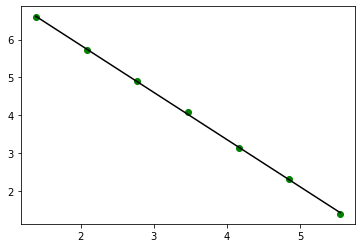

In [9]:
linreg(x, y)


image interpolation?
threshold


In [15]:
def remove_colour(fname, col_min, col_max):
    upstate = cv2.imread('fig1_modified.png')
    upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)
    mask_inverse = cv2.inRange(upstate_hsv, col_min, col_max)
    mask = cv2.bitwise_not(mask_inverse)
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    masked_upstate = cv2.bitwise_and(upstate, mask_rgb)
    # masked_replace_white = cv2.addWeighted(masked_upstate, 1, cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)
    # img = masked_upstate
    cv2.imwrite(fname, masked_upstate)
    
    
    

historgram of unique colours in image, more methodical to select colour bands

(array([[5.812e+03, 5.000e+00, 5.000e+00, 1.000e+00, 2.800e+01, 2.600e+01,
         2.000e+00, 3.000e+01, 3.000e+00, 4.000e+00],
        [5.912e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00],
        [5.813e+03, 2.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
         2.000e+00, 1.000e+00, 0.000e+00, 9.000e+01]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 3 BarContainer objects>)

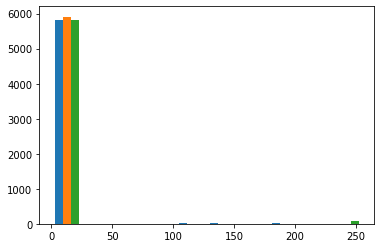

In [66]:
plt.hist(img[234])

In [67]:
img = cv2.imread("tester.png")

In [69]:

"""#for i in (range(10)):
res2 = []
res = []
count = 0
for pixel in tqdm(img):
    for i in pixel:
        res2.append(i)
        #count +=1
        #if count >10:
        #    break
        calc = i[0] + (i[1]*255) + (i[2]*(255**2))
        #res.append(calc)"""
        

100%|███████████████████████████████████████| 5916/5916 [03:32<00:00, 27.85it/s]






# Cut this out

In [ ]:
tuple(abs(aItem+bItem) for aItem, bItem in zip(ranges[i][0], (1,1,1))) #abs(my_dict[curr_col] - my_dict[prev_col])

In [86]:
flat_array

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [94]:
test = list(filter(lambda a: a != 65281, res))

In [95]:
len(test)

4507594

In [81]:
giv = [1,2,4,1,2,6,3,7,10]

In [105]:
test2 = []
for i in test:
    if i >1000000 and i< 16000000:
        test2.append(i)

In [106]:
len(test2)

863050

In [52]:
plt.hist(test2, bins = 50)

NameError: name 'test2' is not defined

In [ ]:
255,0,0

In [110]:
2000000/65281

30.63678558845606

In [109]:
0.2*10000000

2000000.0

(array([2673989.,  319216.,   80904.,   85281.,   55853.,   30859.,
          32278.,   26555.,   28936.,   37742.,   17140.,    7909.,
           9775.,   18474.,   21260.,   20110.,   36002.,   38478.,
          12682.,    8983.,   18679.,   23313.,   10373.,    3345.,
          10249.,   60111.,   52107.,   27283.,   24086.,    9870.,
           3241.,    3068.,   14991.,   91783.,  592669.]),
 array([       0.        ,   475618.71428571,   951237.42857143,
         1426856.14285714,  1902474.85714286,  2378093.57142857,
         2853712.28571429,  3329331.        ,  3804949.71428571,
         4280568.42857143,  4756187.14285714,  5231805.85714286,
         5707424.57142857,  6183043.28571429,  6658662.        ,
         7134280.71428571,  7609899.42857143,  8085518.14285714,
         8561136.85714286,  9036755.57142857,  9512374.28571429,
         9987993.        , 10463611.71428571, 10939230.42857143,
        11414849.14285714, 11890467.85714286, 12366086.57142857,
        1284170

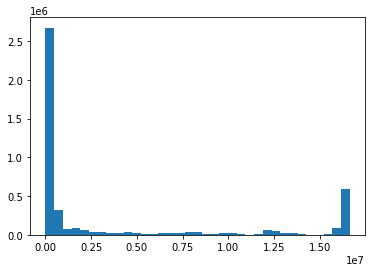

In [112]:
plt.hist(test, bins = 35)

In [98]:
1.6*10000000

16000000.0

# Cut this out

In [11]:
ranges ={'Violet': [(150, 100, 100), (180, 255, 255)],
 'Indigo': [(135, 100, 100), (150, 255, 255)],
 'Blue': [(90, 100, 100), (135, 255, 255)],
 'Green': [(35, 100, 100), (90, 255, 255)],
 'Yellow': [(25, 100, 100), (35, 255, 255)],
 'Orange': [(10, 100, 100), (25, 255, 255)],
 'Red': [(0,100,100),(10,100,100)]}

In [20]:
remove_colour("./colours/withoutred.png", red_min, red_max)

In [19]:
red_min = np.array(ranges['Violet'][0], np.uint8) #grey
red_max = np.array(ranges['Violet'][1], np.uint8)

In [9]:
import cv2
import numpy as np
 
image = cv2.imread('turnerimg.png')
#cv2.imshow('result', result)cv2.imshow("Original", image)
 
result = image.copy()
 
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# lower boundary RED color range values; Hue (0 - 10)
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])
 
# upper boundary RED color range values; Hue (160 - 180)
lower2 = np.array([160,100,20])
upper2 = np.array([179,255,255])
 
lower_mask = cv2.inRange(image, lower1, upper1)
upper_mask = cv2.inRange(image, lower2, upper2)
 
full_mask = lower_mask + upper_mask;
 
result = cv2.bitwise_and(result, result, mask=full_mask)
 
cv2.imwrite('result.png', result)


True

In [24]:
for i in ranges.keys():
    mini = np.array((ranges[i])[0], np.uint8)
    maxi = np.array((ranges[i])[1], np.uint8)
    remove_colour("./colours/without{}.png".format(i), mini, maxi)